В 2912 году космический лайнер Spaceship Titanic отправился в своё первое путешествие, перевозя почти 13000 пассажиров от Земли и колоний к трём новым пригодным для жизни экзопланетам. Во время полёта в районе Альфы Центавра корабль столкнулся с пространственно-временной аномалией, в результате чего часть пассажиров была мгновенно перенесена в альтернативное измерение.

Системы корабля были повреждены, но удалось сохранить неполные записи о пассажирах: данные о месте проживания до вылета, предполагаемом пункте назначения, возрасте, питании, развлеченииях, а также их расположении в каютах.

Задача состоит в том, чтобы на основе этих данных построить модель, способную предсказать, был ли пассажир перенесен в альтернативное измерение, для того чтобы спасательным службам было быстрее находить пострадавших

Цель проекта является разработка и обучение модели машинного обучения, которая по признакам пассажира (например, планета происхождения, каюта, траты на борту, возраст) сможет с высокой точностью классифицировать, был ли пассажир перенесён в другое измерение (Transported: True/False).

Для этого потребуется:

- Провести исследовательский анализ данных и выявить закономерности

- Выполнить предобработку данных.

- Обучить и сравнить несколько алгоритмов классификации.

- Выбрать оптимальную модель и оценить её точность.

- Подготовить файл с предсказаниями

In [1]:
import pandas as pd # Для начала импортируем библиотеку для работы с таблицами
# библиотеки для визуализации графиков
import matplotlib.pyplot as plt
import seaborn as sns
# библиотеки для работы с мат. вычеслениями
import numpy as np
from math import *

# 1. Знакомство с данными

Для работы представлены 2 файла - train и test

In [2]:
# импортируем файлы с тренировочной и тестовой выборками
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info() # информация о столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df_train.head() # выводим 1-ые 5 строк

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
df_test.iloc[:5] # 1-ые 5 строк можно так же вывести этим методом

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez



- train.csv — тренировочный набор данных, содержащий: Признаки, описывающие пассажиров (PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name), целевую переменную Transported, которая показывает, был ли пассажир перенесён в другое измерение (True или False).

- test.csv — тестовый набор данных, содержащий только признаки пассажиров без целевой переменной. Цель — предсказать для каждого пассажира значение Transported (которое в таблице пропущено).

train.csv используется для обучения и подбора модели

test.csv применяется для прогноза значений (которые пропущены в таблицы)

| №  | Признак          | Описание                                                                                                                      |
| -- | ---------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| 1  | **PassengerId**  | Уникальный идентификатор пассажира в формате `XXXX_YY`, где `XXXX` — номер группы, а `YY` — номер члена группы.               |
| 2  | **HomePlanet**   | Планета, с которой пассажир начал своё путешествие.                                                                           |
| 3  | **CryoSleep**    | Флаг (`True/False`), указывающий, был ли пассажир помещён в криосон на время полёта.                                          |
| 4  | **Cabin**        | Номер каюты пассажира в формате `Палуба/Номер/Сторона`, где *Сторона* может быть `P` (лево, Port) или `S` (право, Starboard). |
| 5  | **Destination**  | Конечная планета назначения пассажира (например, TRAPPIST-1e, 55 Cancri e, PSO J318.5-22).                                    |
| 6  | **Age**          | Возраст пассажира в годах.                                                                                                    |
| 7  | **VIP**          | Флаг (`True/False`), показывающий, оплатил ли пассажир ВИП-статус                                                                                |
| 8  | **RoomService**  | Сумма, потраченная на обслуживание каюты во время полёта.                                                                     |
| 9  | **FoodCourt**    | Сумма, потраченная в фудкорте на борту корабля.                                                                               |
| 10 | **ShoppingMall** | Сумма, потраченная в торговом центре на борту.                                                                                |
| 11 | **Spa**          | Сумма, потраченная в SPA-зоне корабля.                                                                                        |
| 12 | **VRDeck**       | Сумма, потраченная в VR-зоне (виртуальная реальность).                                                                        |
| 13 | **Name**         | Полное имя пассажира.                                                                                                         |
| 14 | **Transported**  | Целевая переменная (`True/False`), указывающая, был ли пассажир перенесён в альтернативное измерение (на тестовой выборке данного признака нет, т.к. данный признак целевой)                         |


# 2. Исследовательский анализ данных и их обработка

### 2.1. Анализ пропусков в таблице и их обработка

In [7]:
# Первым делом проверим пропуски с помощью метода info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Видно, что в столбцах кол-во значений не равное
# Посчитаем общее количество пропусков с помощью методов isnull() и sum()

# используем цико for, и выводим результат для каждого столбца
for i in df_train.columns:
    print(f"Пропусков в столбце {i}: {df_train[i].isnull().sum()}")

Пропусков в столбце PassengerId: 0
Пропусков в столбце HomePlanet: 201
Пропусков в столбце CryoSleep: 217
Пропусков в столбце Cabin: 199
Пропусков в столбце Destination: 182
Пропусков в столбце Age: 179
Пропусков в столбце VIP: 203
Пропусков в столбце RoomService: 181
Пропусков в столбце FoodCourt: 183
Пропусков в столбце ShoppingMall: 208
Пропусков в столбце Spa: 183
Пропусков в столбце VRDeck: 188
Пропусков в столбце Name: 200
Пропусков в столбце Transported: 0


In [9]:
df_train = df_train.dropna(subset=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'])
stolb = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_train[stolb] = df_train[stolb].fillna(df_train[stolb].mean())

**Категориальные признаки**

В колонках HomePlanet, CryoSleep, Cabin, Destination, VIP, Name обнаружены пропуски.
Так как эти признаки имеют категориальный тип и отсутствующие значения могут затруднить корректную интерпретацию данных, было принято решение удалить строки, содержащие пропуски в этих колонках. Заменить на среднее, медиану и прочие статистические величины тут не получится

**Числовые признаки**

В колонках Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck также присутствуют пропуски.
Поскольку данные признаки отражают возраст или суммы, потраченные пассажирами на определённые услуги, отсутствующие значения будут заменены на среднее арифметическое по соответствующему столбцу (mean), т.к. средний возраст и средняя сумма, потраченная на определенные услуги, отражает общую картину в данных

In [10]:
# Смотрим, что все пропущенные значения были обработаны
print(df_train.info())
print('')
for i in df_train.columns:
    print(f"Пропусков в столбце {i}: {df_train[i].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 834.1+ KB
None

Пропусков в столбце PassengerId: 0
Пропусков в столбце HomePlanet: 0
Пропусков в столбце CryoSleep: 0
Пропусков в столбце Cabin: 0
Пропусков 

Как видно, данные были преобразованы и кол-во данных во всех столбцах - одинаковое

### 2.2. Распределение данных

In [11]:
# Разобьем датафрейм на числовые и категориальные признаки (для удобстава анализа)

df_train_numbers = df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_train_category = df_train[['HomePlanet', 'CryoSleep', 'VIP', 'Destination','Transported']]

Для начала проводим визуальный анализ, делаем графики boxplot (ящики с усами) и гистограммы

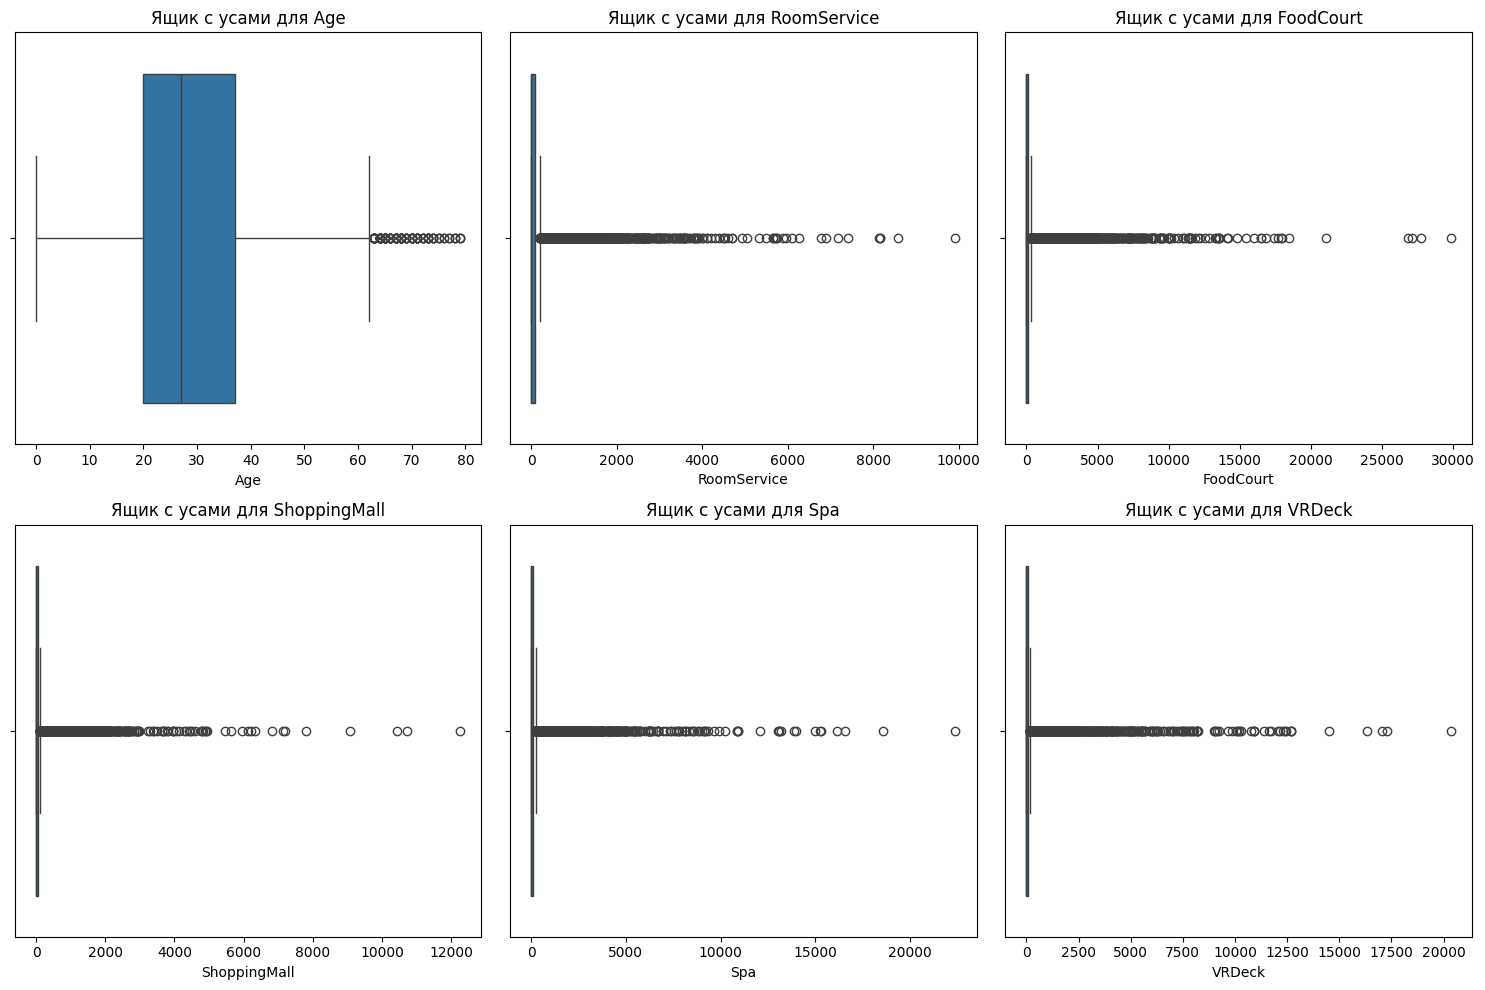

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_train_numbers.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_train_numbers[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

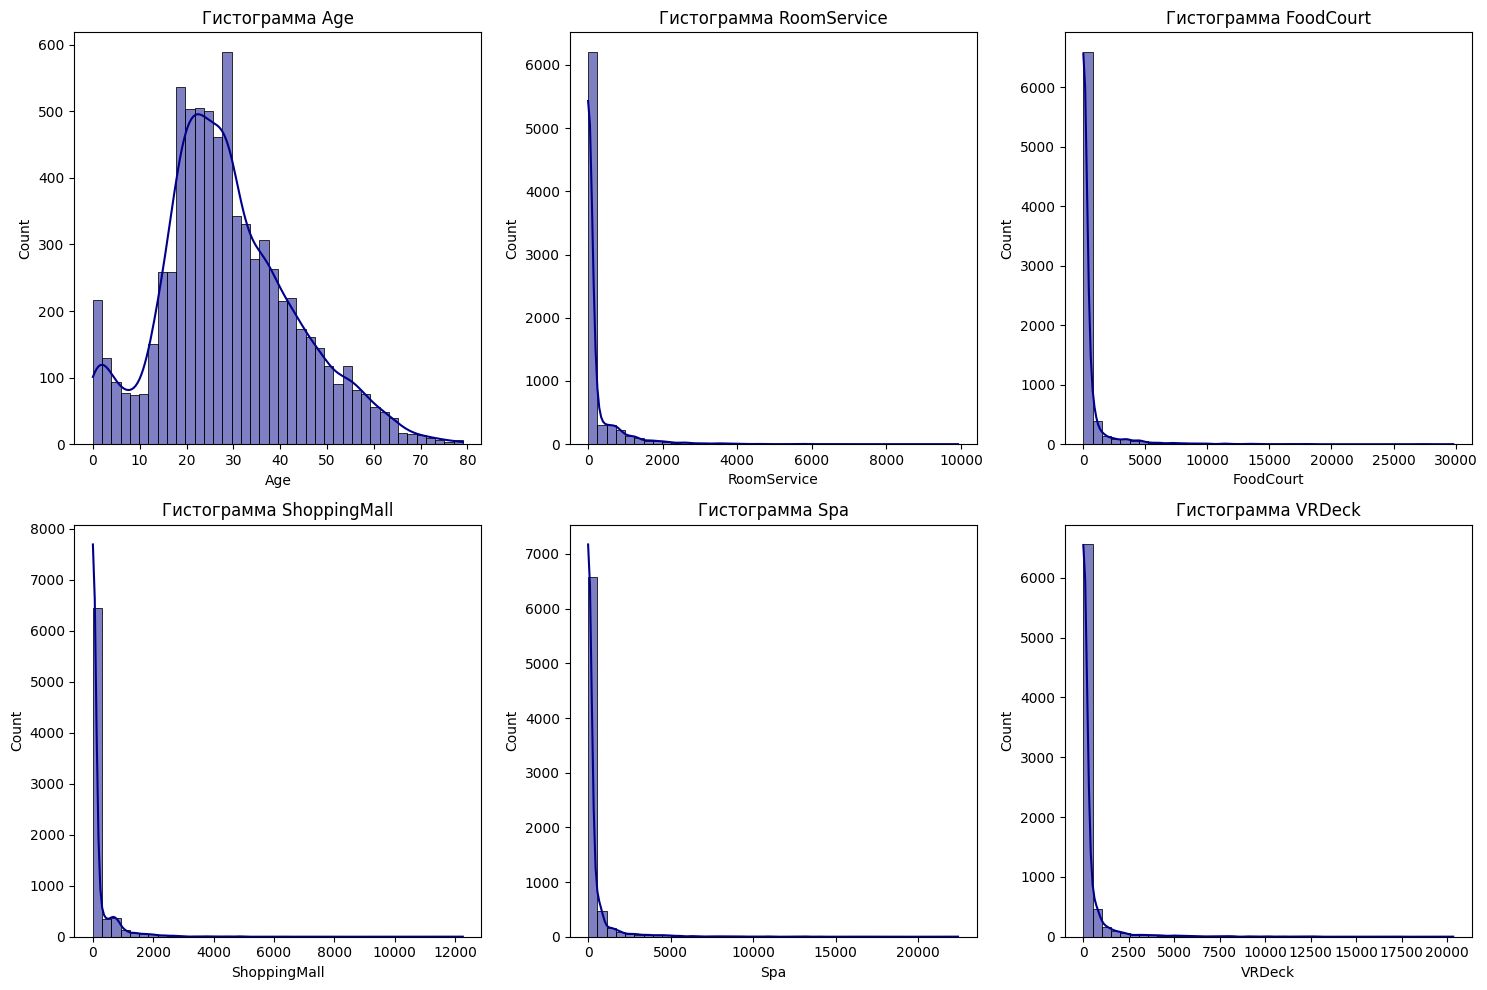

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_train_numbers.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=df_train_numbers[col], kde=True, bins=int(200/5), color = 'darkblue')
    plt.title(f'Гистограмма {col}')
plt.tight_layout()
plt.show()

На первом этапе анализа числовых значений был проведен визуальный анализ распределений (boxplot и гистограммы). По графикам видно, что числовые признаки (особенно затраты: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) содержат значительное количество экстремальных значений с длинными правыми "хвостами"

Далее, проверим выбросы методом IQR (межквартильный размах) и 3σ (три сигмы)

Сначала рассмотрим метод IQR

a - 25ая процентиль признака

b - 75ая процентиль признака

Построить интервал [a-1.5(b-a),b+1.5(b-a)] - это интервал сред. квадратического отклонения. Все объекты, значения признака которых не попадает в этот интервал - объявляются выбросами

In [14]:
# Age
Q1_age = df_train['Age'].quantile(0.25)
Q3_age = df_train['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
print(f"Возраст не считается выбросом на интервале ({Q1_age-1.5*IQR_age}, {Q3_age+1.5*IQR_age})")

# RoomService
Q1_room = df_train['RoomService'].quantile(0.25)
Q3_room = df_train['RoomService'].quantile(0.75)
IQR_room = Q3_room - Q1_room
print(f"RoomService не считается выбросом на интервале ({Q1_room-1.5*IQR_room}, {Q3_room+1.5*IQR_room})")

# FoodCourt
Q1_food = df_train['FoodCourt'].quantile(0.25)
Q3_food = df_train['FoodCourt'].quantile(0.75)
IQR_food = Q3_food - Q1_food
print(f"FoodCourt не считается выбросом на интервале ({Q1_food-1.5*IQR_food}, {Q3_food+1.5*IQR_food})")

# ShoppingMall
Q1_shop = df_train['ShoppingMall'].quantile(0.25)
Q3_shop = df_train['ShoppingMall'].quantile(0.75)
IQR_shop = Q3_shop - Q1_shop
print(f"ShoppingMall не считается выбросом на интервале ({Q1_shop-1.5*IQR_shop}, {Q3_shop+1.5*IQR_shop})")

# Spa
Q1_spa = df_train['Spa'].quantile(0.25)
Q3_spa = df_train['Spa'].quantile(0.75)
IQR_spa = Q3_spa - Q1_spa
print(f"Spa не считается выбросом на интервале ({Q1_spa-1.5*IQR_spa}, {Q3_spa+1.5*IQR_spa})")

# VRDeck
Q1_vr = df_train['VRDeck'].quantile(0.25)
Q3_vr = df_train['VRDeck'].quantile(0.75)
IQR_vr = Q3_vr - Q1_vr
print(f"VRDeck не считается выбросом на интервале ({Q1_vr-1.5*IQR_vr}, {Q3_vr+1.5*IQR_vr})")

Возраст не считается выбросом на интервале (-5.5, 62.5)
RoomService не считается выбросом на интервале (-120.0, 200.0)
FoodCourt не считается выбросом на интервале (-183.0, 305.0)
ShoppingMall не считается выбросом на интервале (-70.5, 117.5)
Spa не считается выбросом на интервале (-138.0, 230.0)
VRDeck не считается выбросом на интервале (-111.75, 186.25)


Проверка выбросов с помощью интервала (m-3s,m+3s) - это интервал сред. квадратического отклонения. Все, что не попадает в этот интервал - это выбросы

m - сред. знач. признака .mean()

s - отклонение признака .std()

In [15]:
# Age
M_age = df_train['Age'].mean()
S_age = df_train['Age'].std()
print(f"Возраст не считается выбросом на интервале ({M_age-3*S_age}, {M_age+3*S_age})")

# RoomService
M_room = df_train['RoomService'].mean()
S_room = df_train['RoomService'].std()
print(f"RoomService не считается выбросом на интервале ({M_room-3*S_room}, {M_room+3*S_room})")

# FoodCourt
M_food = df_train['FoodCourt'].mean()
S_food = df_train['FoodCourt'].std()
print(f"FoodCourt не считается выбросом на интервале ({M_food-3*S_food}, {M_food+3*S_food})")

# ShoppingMall
M_shop = df_train['ShoppingMall'].mean()
S_shop = df_train['ShoppingMall'].std()
print(f"ShoppingMall не считается выбросом на интервале ({M_shop-3*S_shop}, {M_shop+3*S_shop})")

# Spa
M_spa = df_train['Spa'].mean()
S_spa = df_train['Spa'].std()
print(f"Spa не считается выбросом на интервале ({M_spa-3*S_spa}, {M_spa+3*S_spa})")

# VRDeck
M_vr = df_train['VRDeck'].mean()
S_vr = df_train['VRDeck'].std()
print(f"VRDeck не считается выбросом на интервале ({M_vr-3*S_vr}, {M_vr+3*S_vr})")

Возраст не считается выбросом на интервале (-14.15545692765193, 71.8478062112421)
RoomService не считается выбросом на интервале (-1673.4282213224506, 2116.0662315954974)
FoodCourt не считается выбросом на интервале (-4414.621925250806, 5344.562736061617)
ShoppingMall не считается выбросом на интервале (-1507.3486985468971, 1861.4877606233404)
Spa не считается выбросом на интервале (-3043.1239017361377, 3660.8891485245085)
VRDeck не считается выбросом на интервале (-3045.4717340319867, 3655.9462231374137)


Для проверки наблюдений, которые были на графиках boxplot и гистограммах, были рассчитаны границы нормальных значений двумя методами: межквартильного размаха (IQR) и «трех сигм». Метод трех сигм показал очень широкие интервалы, из-за чего многие визуально очевидные выбросы не попадали в категорию аномальных значений. В то время как результаты IQR оказались более близкими к результатам на графиках и лучше отражал реальное распределение данных.

Для дальнейшей очистки данных выбран метод IQR, как более адекватный для признаков с неравномерным и асимметричным распределением.

Чтобы не «терять» потенциально полезную информацию и одновременно проверить устойчивость моделей, решено провести дальнейший анализ в двух параллельных ветках данных:

- df_train_full (с выбросами) — данные после стандартной предобработки, без удаления выбросов.
Цель: сохранить всю вариативность, оценить пользу редких, но реальных наблюдений.

- df_train_clean (без выбросов) — копия данных, где выбросы обработаны (см. ниже).
Цель: проверить, улучшает ли контроль выбросов стабильность и качество.

Теперь ознакомимся с распределением категориальных признаков

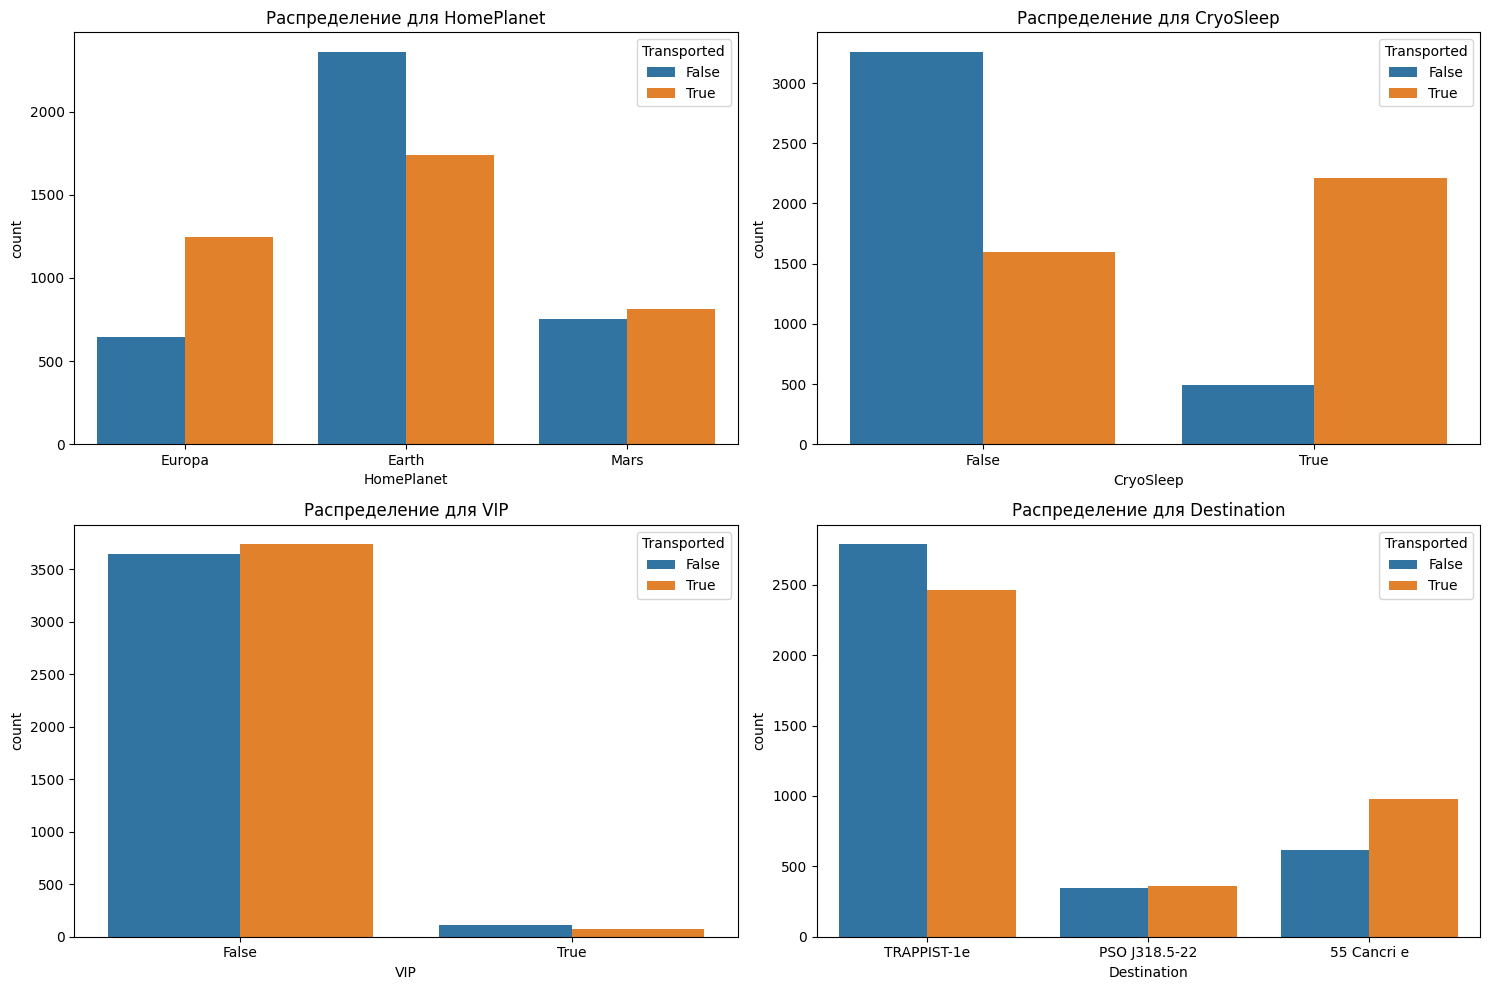

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_train_category.columns.drop('Transported'), 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_train_category, x=col, hue='Transported')
    plt.title(f'Распределение для {col}')
plt.tight_layout()
plt.show()

HomePlanet — исходная планета пассажира влияет на вероятность транспортировки:

Пассажиры с Europa чаще попадают в другое измерение.

С Earth — наоборот, чаще остаются на борту.

С Mars распределение почти равное.

CryoSleep — один из самых сильных предикторов:

Пассажиры в состоянии криосна почти всегда транспортированы.

Те, кто не спал, чаще не были транспортированы.

VIP — доля VIP-пассажиров крайне мала, а статус VIP почти не влияет на вероятность транспортировки (распределение близко к равному).

Destination — пункт назначения имеет заметное влияние:

Для 55 Cancri e больше транспортированных.

Для TRAPPIST-1e больше нетранспортированных.

PSO J318.5-22 — распределение сбалансировано.

Анализ категориальных признаков показал, что вероятность транспортировки зависит от исходной планеты, состояния криосна и пункта назначения, при этом статус VIP практически не оказывает влияния. Наиболее сильным предиктором является признак CryoSleep — пассажиры в криосне значительно чаще оказываются в альтернативном измерении.

### 2.3. Работа с выбросами

In [17]:
# Сначала создаем 2 копии датафрейма df_train - один где выбросы остались, другой - где их нет
df_train_full = df_train.copy()
df_train_clean = df_train.copy()

Приступим к устранению выбросов в датафрейме df_train_clean

df_train_clean ДО устранения аналогичен df_train_full

Возраст (Age):
Поскольку возраст является естественной характеристикой, его значения не могут быть «обрезаны» механически. Вместо удаления или усечения выбросов, они будут заменены на медиану по выборке, что позволит сохранить все наблюдения, минимизируя искажения распределения.

Признаки затрат (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck):
Для этих признаков выбросы будут обработаны методом клиппинга: значения ниже нижней границы будут заменены на саму границу, а значения выше верхней границы — на верхнюю границу. Здесь мы заменяем на значение верхней границы. Такой метод применяется, чтоб снизить влияние экстремальных наблюдений, сохраняя при этом вариативность данных и не теряя информацию о «богатых пассажирах», у которых просто очень большие траты.

In [18]:
# Age (замена выбросов средним значением)
Q1_age = df_train_clean['Age'].quantile(0.25)
Q3_age = df_train_clean['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
age_median = df_train_clean['Age'].median().round(0)
df_train_clean['Age'] = np.where(
    (df_train_clean['Age'] < lower_age) | (df_train_clean['Age'] > upper_age),
    age_median,
    df_train_clean['Age']
)

In [19]:
# RoomService (клиппинг)
Q1_rs = df_train_clean['RoomService'].quantile(0.25)
Q3_rs = df_train_clean['RoomService'].quantile(0.75)
IQR_rs = Q3_rs - Q1_rs
df_train_clean['RoomService'] = df_train_clean['RoomService'].clip(Q1_rs - 1.5*IQR_rs, Q3_rs + 1.5*IQR_rs)

# FoodCourt (клиппинг)
Q1_fc = df_train_clean['FoodCourt'].quantile(0.25)
Q3_fc = df_train_clean['FoodCourt'].quantile(0.75)
IQR_fc = Q3_fc - Q1_fc
df_train_clean['FoodCourt'] = df_train_clean['FoodCourt'].clip(Q1_fc - 1.5*IQR_fc, Q3_fc + 1.5*IQR_fc)

# ShoppingMall (клиппинг)
Q1_sm = df_train_clean['ShoppingMall'].quantile(0.25)
Q3_sm = df_train_clean['ShoppingMall'].quantile(0.75)
IQR_sm = Q3_sm - Q1_sm
df_train_clean['ShoppingMall'] = df_train_clean['ShoppingMall'].clip(Q1_sm - 1.5*IQR_sm, Q3_sm + 1.5*IQR_sm)

# Spa (клиппинг)
Q1_spa = df_train_clean['Spa'].quantile(0.25)
Q3_spa = df_train_clean['Spa'].quantile(0.75)
IQR_spa = Q3_spa - Q1_spa
df_train_clean['Spa'] = df_train_clean['Spa'].clip(Q1_spa - 1.5*IQR_spa, Q3_spa + 1.5*IQR_spa)

# VRDeck (клиппинг)
Q1_vr = df_train_clean['VRDeck'].quantile(0.25)
Q3_vr = df_train_clean['VRDeck'].quantile(0.75)
IQR_vr = Q3_vr - Q1_vr
df_train_clean['VRDeck'] = df_train_clean['VRDeck'].clip(Q1_vr - 1.5*IQR_vr, Q3_vr + 1.5*IQR_vr)

После того, как выбросы устранены, смотрим на графиках boxplot как распределены обработанные данные

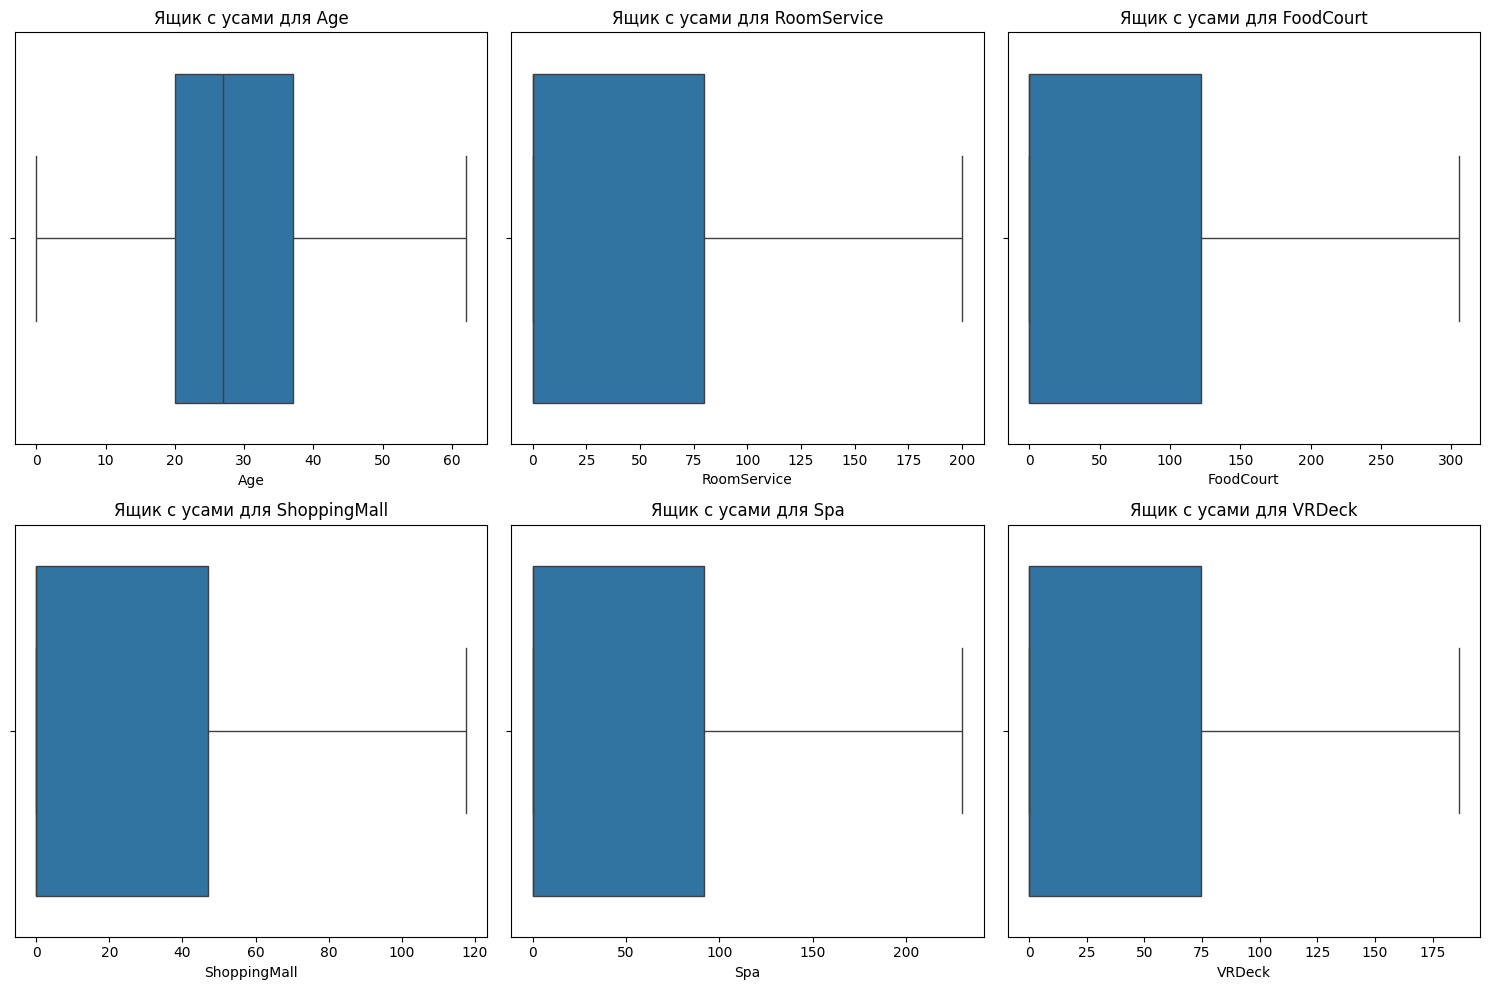

In [20]:
array_str_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(15, 10))
for i, col in enumerate(array_str_num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_train_clean[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

Как видно по графикам, выбросов в df_train_clean больше нет

Далее рассмотрим распределение

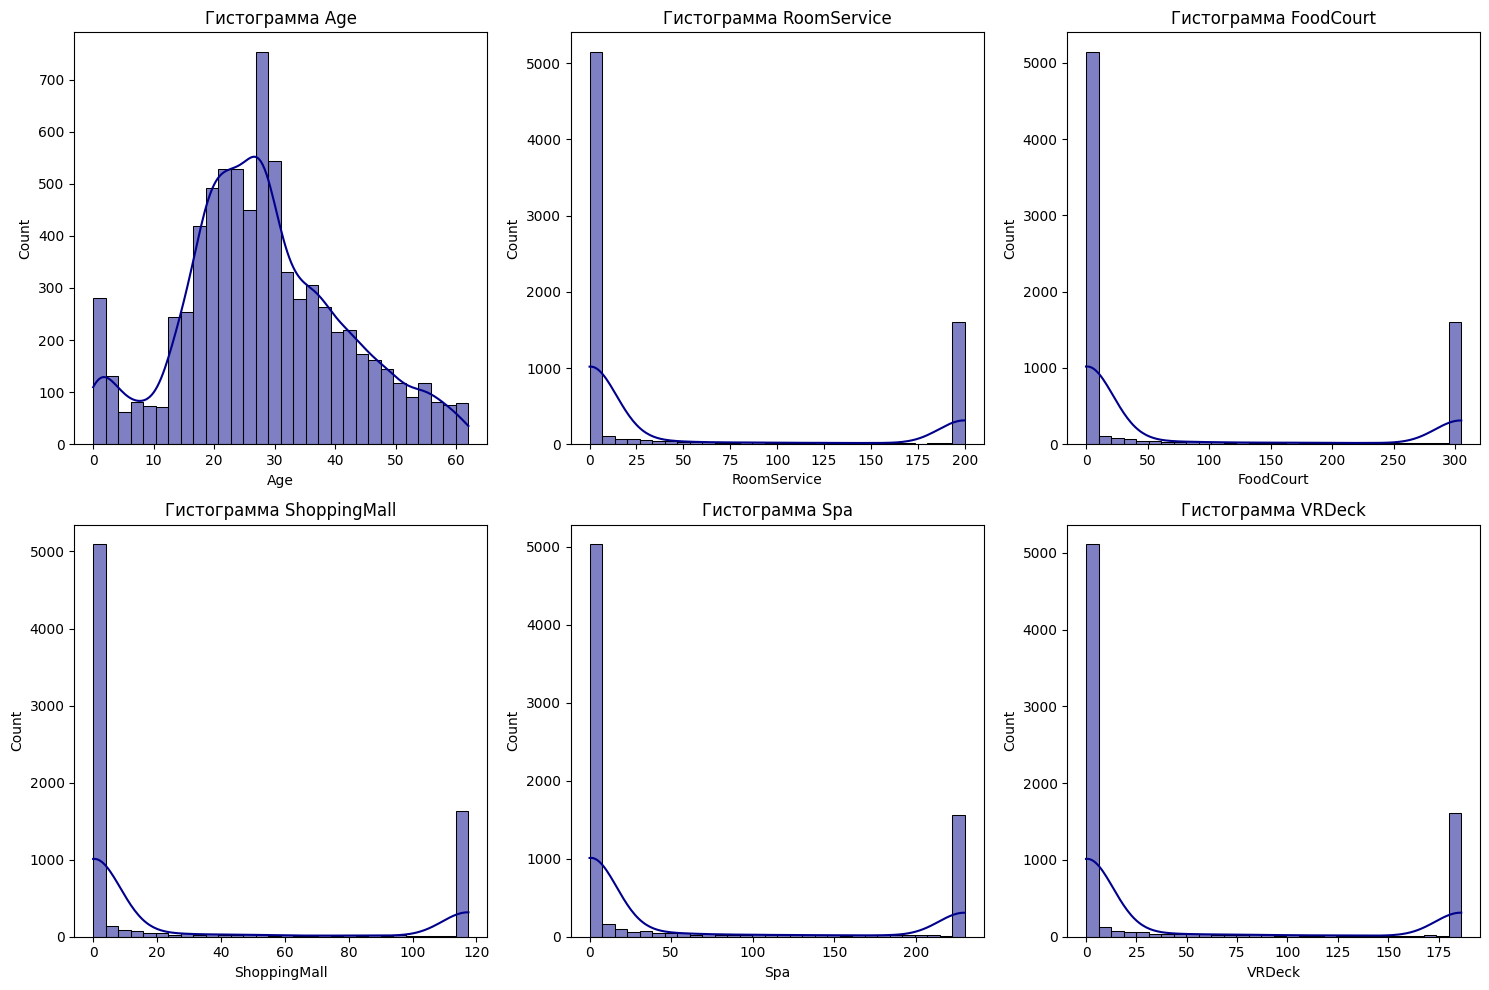

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(array_str_num, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=df_train_clean[col], kde=True, bins=int(150/5), color = 'darkblue')
    plt.title(f'Гистограмма {col}')
plt.tight_layout()
plt.show()

После удаления выбросов методами замены/клиппинга наблюдается следующая картина:

Признак Age: распределение близко к нормальному. Большинство пассажиров находятся в среднем возрасте, и это отражается в форме «горки» — больше значений в центре, меньше по краям.

Признаки затрат (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck): распределения приняли вид с высокими столбцами у граничных значений и низкими — в центре. Это связано с применением метода клиппинга. Все значения, выходившие за верхнюю границу допустимого интервала (очень крупные траты), были «срезаны» и заменены на максимально допустимое значение по методу IQR. В результате многие «богатые» пассажиры оказались сгруппированы в одной точке на правой границе. Поэтому, у денежных признаков распределения искажены из-за большого количества выбросов, которые искусственно сосредоточились на верхней границе допустимых значений.

### 2.4. Матрица корреляций

Далее следует построить матрицы корреляций для df_train_clean и df_train_full, чтобы выявить зависимость признаков

In [22]:
# Копии датафреймов, чтобы не портить оригинал
df_corr_clean_bool = df_train_clean.copy()
df_corr_full_bool = df_train_full.copy()

# Переводим булевые признаки CryoSleep и VIP в числовой формат
for col in ['CryoSleep', 'VIP']:
    df_corr_clean_bool[col] = df_corr_clean_bool[col].astype(int)
    df_corr_full_bool[col] = df_corr_full_bool[col].astype(int)

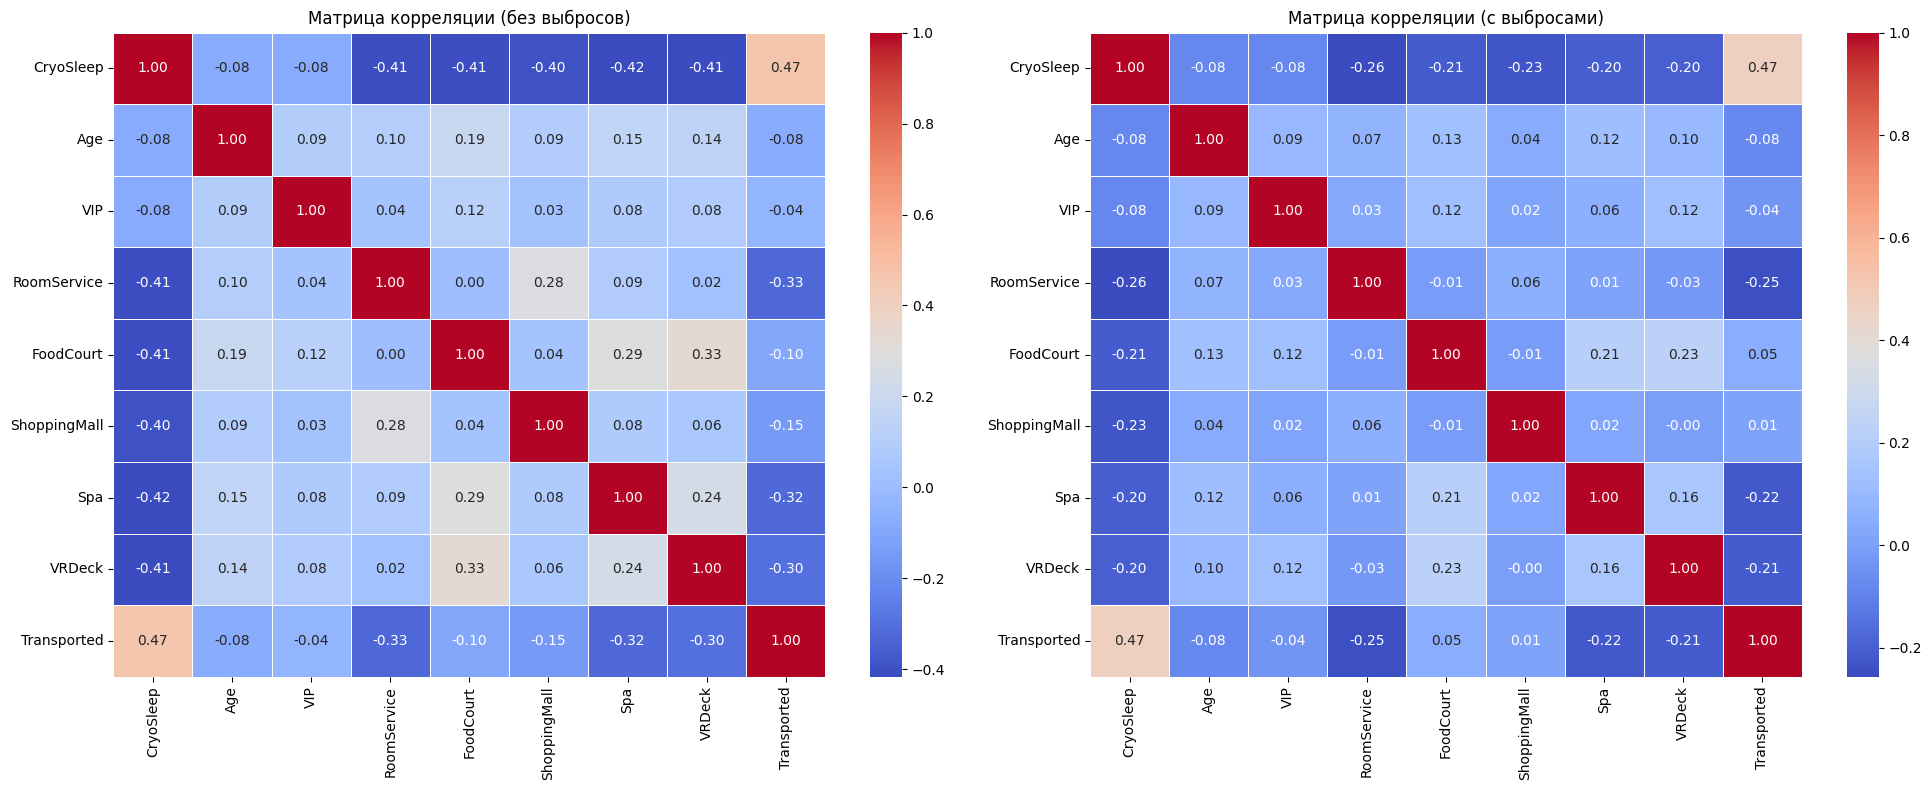

In [23]:
plt.figure(figsize=(20, 8))
# Первая матрица (без выбросов) — СЛЕВА
plt.subplot(1, 2, 1)  # 1 строка, 2 столбец, позиция 1
corr_matrix1 = df_corr_clean_bool.corr(numeric_only=True)
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (без выбросов)")
# Вторая матрица (с выбросами) — СПРАВА
plt.subplot(1, 2, 2)  # 1 строка, 2 столбцец, позиция 2
corr_matrix2 = df_corr_full_bool.corr(numeric_only=True)
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (с выбросами)")
plt.tight_layout()  # Чтобы избежать наложения заголовков
plt.show()

После удаления выбросов матрица корреляций стала более понятной для анализа. Если в исходных данных экстремальные значения «размывали» зависимости, то после очистки появились более четкие и логичные связи. Это заметно для признаков, связанных с криосном и тратами: отрицательные корреляции усилились, что отражает естественную логику поведения пассажиров (в криосне они почти не тратят). Однако, если пассажир находится в криосне - у них больше вероятность попасть в другое измерение. Удаление выбросов позволило уменьшить влияние шума и получить более достоверные зависимости между признаками, поэтому для дальнейшего анализа будет использоваться датафрейм с очищенными данными (df_train_clean)

# 3. Подготовка к моделированию, работа с тестовой выборкой

### 3.1. Работа с пропущенными значениями

Уже определено, что дальнейшая работа с данными будет с тем набором данных, который очищен от выбросов. Поэтому, тестовую выборку небоходимо обработать аналогичным образом (если пропуски там есть)

In [24]:
df_test_clean = df_test.copy()
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Пропуски есть. Следовательно удаляем их по аналогичному принципу, что и в df_train

In [25]:
df_test_clean = df_test_clean.dropna(subset=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'])
stolb2 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_test_clean[stolb2] = df_test_clean[stolb2].fillna(df_test_clean[stolb2].mean())

for i in df_test_clean.columns:
    print(f"Пропусков в столбце {i}: {df_test_clean[i].isnull().sum()}")

Пропусков в столбце PassengerId: 0
Пропусков в столбце HomePlanet: 0
Пропусков в столбце CryoSleep: 0
Пропусков в столбце Cabin: 0
Пропусков в столбце Destination: 0
Пропусков в столбце Age: 0
Пропусков в столбце VIP: 0
Пропусков в столбце RoomService: 0
Пропусков в столбце FoodCourt: 0
Пропусков в столбце ShoppingMall: 0
Пропусков в столбце Spa: 0
Пропусков в столбце VRDeck: 0
Пропусков в столбце Name: 0


Пропусков больше нет, теперь приступим к обработке выбросов

### 3.2. Работа с выбросами

Аналогичным образом, сначала строим boxplot

In [26]:
df_test_clean_numbers = df_test_clean[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

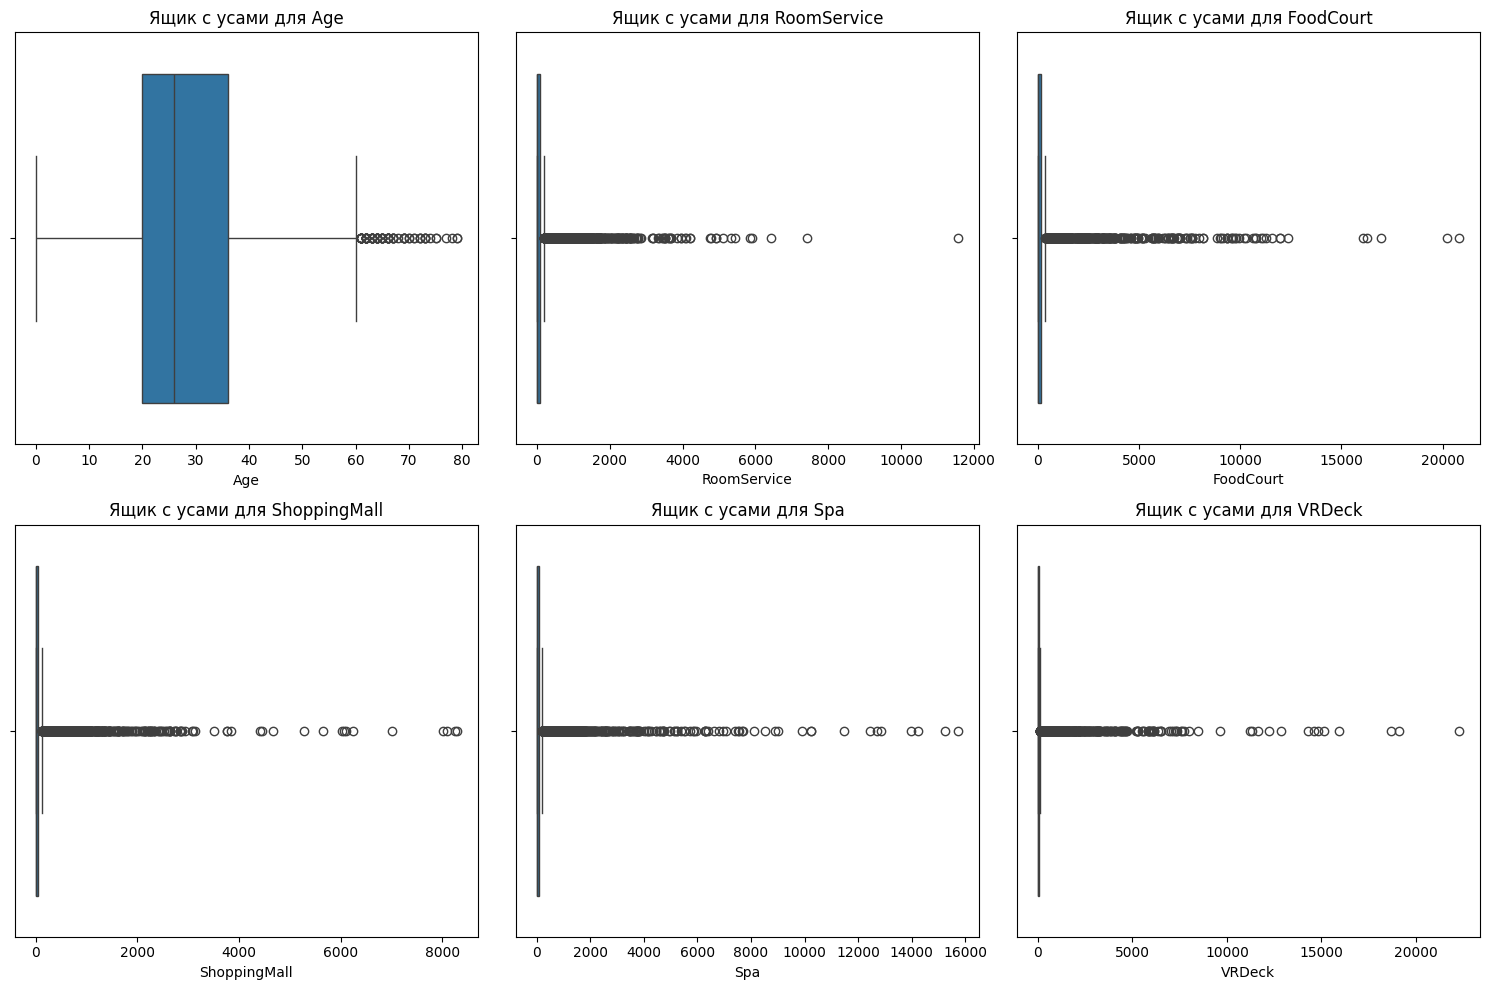

In [27]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_test_clean_numbers.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_test_clean_numbers[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

Видны почти такие же хвосты. Считаем методом IQR границы нормальных значений и по ним устраняем выбросы

In [28]:
# Age (замена выбросов медианой из train)
df_test_clean['Age'] = np.where(
    (df_test_clean['Age'] < lower_age) | (df_test_clean['Age'] > upper_age),
    age_median, # Заменяем медианой из тренировочной выбоки, чтоб избежать утечек данных
    df_test_clean['Age']
)
print(f"Age нормальные значения: {lower_age:.2f} - {upper_age:.2f}, выбросы заменяем на {age_median}")

# RoomService (клиппинг)
Q1_rs = df_test_clean['RoomService'].quantile(0.25)
Q3_rs = df_test_clean['RoomService'].quantile(0.75)
IQR_rs = Q3_rs - Q1_rs
lower_rs, upper_rs = Q1_rs - 1.5*IQR_rs, Q3_rs + 1.5*IQR_rs
print(f"RoomService: ({lower_rs:.2f}, {upper_rs:.2f})")

df_test_clean['RoomService'] = df_test_clean['RoomService'].clip(lower_rs, upper_rs)

# FoodCourt (клиппинг)
Q1_fc = df_test_clean['FoodCourt'].quantile(0.25)
Q3_fc = df_test_clean['FoodCourt'].quantile(0.75)
IQR_fc = Q3_fc - Q1_fc
lower_fc, upper_fc = Q1_fc - 1.5*IQR_fc, Q3_fc + 1.5*IQR_fc
print(f"FoodCourt: ({lower_fc:.2f}, {upper_fc:.2f})")

df_test_clean['FoodCourt'] = df_test_clean['FoodCourt'].clip(lower_fc, upper_fc)

# ShoppingMall (клиппинг)
Q1_sm = df_test_clean['ShoppingMall'].quantile(0.25)
Q3_sm = df_test_clean['ShoppingMall'].quantile(0.75)
IQR_sm = Q3_sm - Q1_sm
lower_sm, upper_sm = Q1_sm - 1.5*IQR_sm, Q3_sm + 1.5*IQR_sm
print(f"ShoppingMall: ({lower_sm:.2f}, {upper_sm:.2f})")

df_test_clean['ShoppingMall'] = df_test_clean['ShoppingMall'].clip(lower_sm, upper_sm)

# Spa (клиппинг)
Q1_spa = df_test_clean['Spa'].quantile(0.25)
Q3_spa = df_test_clean['Spa'].quantile(0.75)
IQR_spa = Q3_spa - Q1_spa
lower_spa, upper_spa = Q1_spa - 1.5*IQR_spa, Q3_spa + 1.5*IQR_spa
print(f"Spa: ({lower_spa:.2f}, {upper_spa:.2f})")

df_test_clean['Spa'] = df_test_clean['Spa'].clip(lower_spa, upper_spa)

# VRDeck (клиппинг)
Q1_vr = df_test_clean['VRDeck'].quantile(0.25)
Q3_vr = df_test_clean['VRDeck'].quantile(0.75)
IQR_vr = Q3_vr - Q1_vr
lower_vr, upper_vr = Q1_vr - 1.5*IQR_vr, Q3_vr + 1.5*IQR_vr
print(f"VRDeck: ({lower_vr:.2f}, {upper_vr:.2f})")

df_test_clean['VRDeck'] = df_test_clean['VRDeck'].clip(lower_vr, upper_vr)

Age нормальные значения: -5.50 - 62.50, выбросы заменяем на 27.0
RoomService: (-120.00, 200.00)
FoodCourt: (-222.00, 370.00)
ShoppingMall: (-69.00, 115.00)
Spa: (-116.25, 193.75)
VRDeck: (-75.00, 125.00)


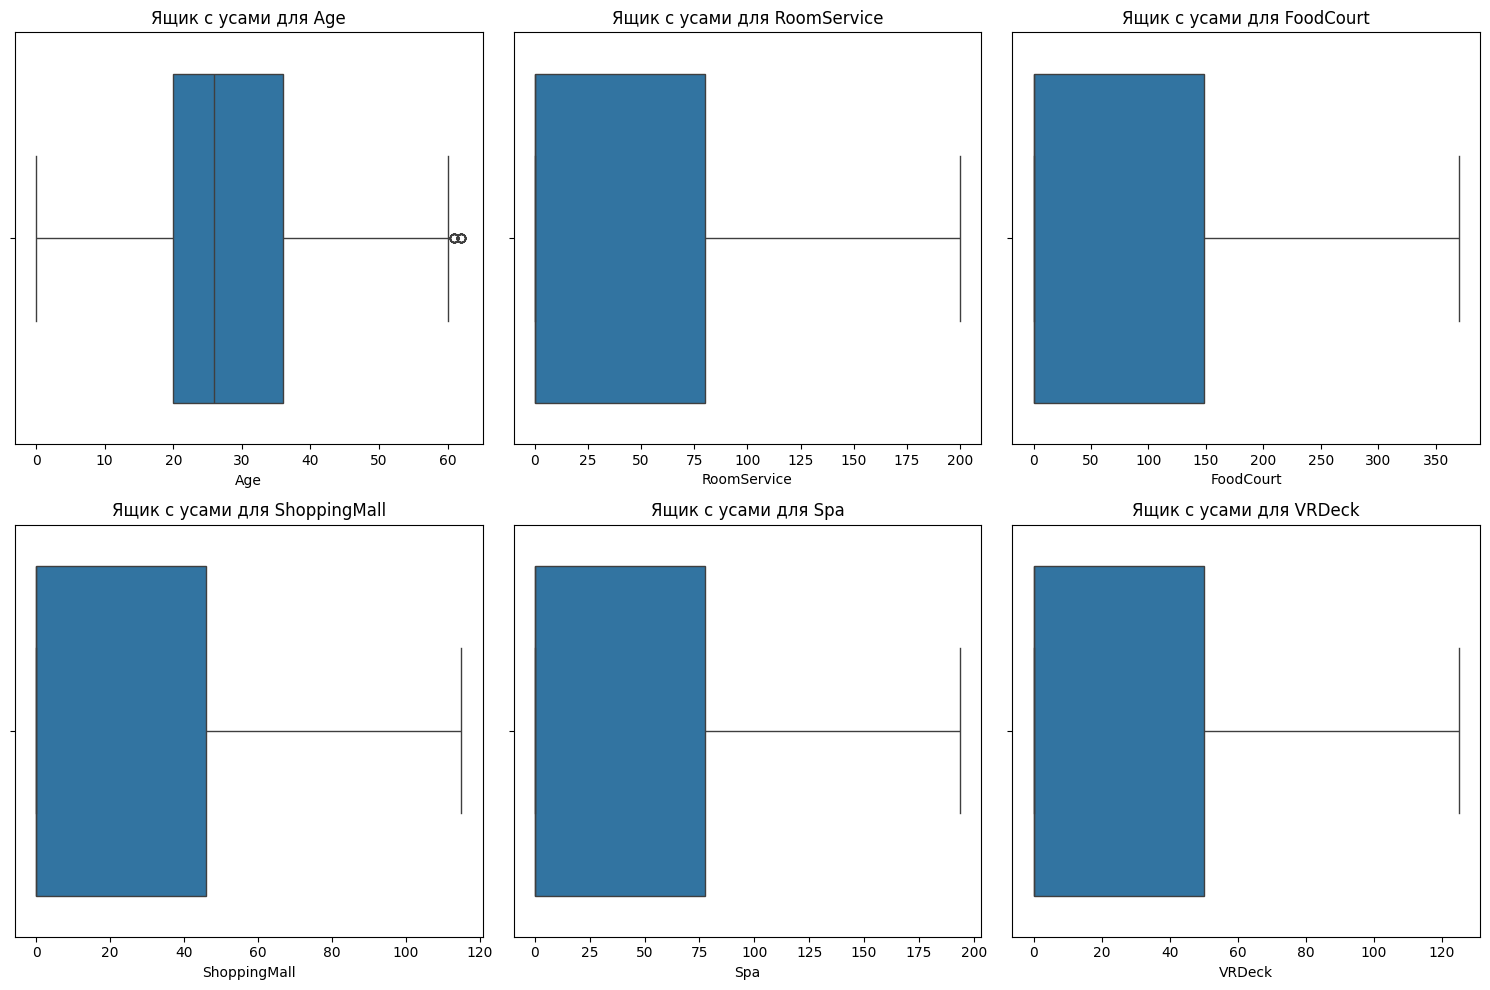

In [29]:
array_test = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(15, 10))
for i, col in enumerate(array_test, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_test_clean[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

Выбросы устранены. Теперь нужно добавить пустой столбцец Transported в тестовую выборку и приступить к моделированию

In [30]:
df_test_clean['Transported'] = None

# 4. Моделирование (машинное обучение)

Для решения данной задачи классификации (прогнозирование признака Transported — был ли пассажир перенесен в альтернативное измерение) были выбраны два алгоритма: Случайный лес (Random Forest) и Градиентный бустинг (Gradient Boosting).

Случайный лес используется как базовая ансамблевая модель, которая хорошо работает с табличными данными и устойчива к шуму. Градиентный бустинг был выбран как более сложная модель, способная выявлять нелинейные зависимости и обычно показывающая более высокую точность. Обе модели будут обучены по отдельности, а затем их результаты будут сравнены. Лучшая из моделей будет использована для предсказания вероятности переноса пассажиров в альтернативное измерение на тестовой выборке.

Случайный лес отличается устойчивостью к шуму, простотой настройки и возможностью интерпретации результатов, а градиентный бустинг, более сложен, но позволяет достичь высокой точности за счет последовательного "исправления" ошибок предыдущих деревьев.

In [31]:
# Импортируем библиотеки, которые позволят обучить случайный лес (ансабль нескольких деревьев) и градиентный бустинг
from sklearn.ensemble import RandomForestClassifier # ансамбль нескольких деревьев
from sklearn.ensemble import GradientBoostingClassifier # градиентный бустинг
from sklearn.model_selection import train_test_split # для разделения модели на обучающую и тестовую выборку
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 4.1. Случайный лес

In [32]:
df_exit = df_test_clean.copy() # копируем тестовую выборку для выходного датафрейма

Гипотеза: Наиболее вероятно человек оказался в другом измерении, который находился в криосне, который из планеты (спутника точнее) Европа, и который двигался к 55 Cancri e. И, как правило, люди, которые меньше тратили денег на товары и услуги, у них больше шансов оказаться в другом измерении (хоть и связь с этим крайне мала)

In [33]:
df_train_encoded = df_train_clean.drop(columns=['Cabin', 'Name']) # Удаляем столбцы Cabin и Name т.к. они нам не нужны
df_train_encoded = pd.get_dummies(df_train_encoded, columns=['HomePlanet','CryoSleep','Destination','VIP']) # переводим данные столбцы из категориального в числовой (или логический формат)
# Обучаем тренировочную выборку
X_train_1 = df_train_encoded.drop(columns=['Transported'])
y_train_1 = df_train_encoded['Transported']
model_1 = RandomForestClassifier(n_estimators=260, max_depth=11, random_state=0) # случайный лес
# n_estimators=260 - количество деревьев
# max_depth=11 - максимальная глубина каждого дерева
# random_state - фиксирует случайность при построении леса, чтобы результаты обучения и предсказания были воспроизводимыми
model_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=11, n_estimators=260, random_state=0)

У тестовой выборки нет правильных ответов (Transported), поэтому напрямую проверить ее мы не можем. Поэтому, мы будем проверять качество на обучающей выборке, разбив ее так же, на обучающую и тестовую выборки

In [34]:
# Проверка правильности предсказания
# Делим тренировочную выборку на тренировочную (80%) и тестовую (20%) выборки
X_train_train_1, X_train_test_1, y_train_train_1, y_train_test_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)
model_1.fit(X_train_train_1, y_train_train_1) # обучаем эти данные по модели, которая обучена выше
y_pred_valid = model_1.predict(X_train_test_1) # Строим прогноз, по которому мы проверим кач-во модели
print("Accuracy:", accuracy_score(y_train_test_1, y_pred_valid))
print('')
print(classification_report(y_train_test_1, y_pred_valid))

Accuracy: 0.7678571428571429

              precision    recall  f1-score   support

       False       0.77      0.77      0.77       762
        True       0.77      0.76      0.77       750

    accuracy                           0.77      1512
   macro avg       0.77      0.77      0.77      1512
weighted avg       0.77      0.77      0.77      1512



In [35]:
print(confusion_matrix(y_train_test_1, y_pred_valid)) # матрица ошибок

[[589 173]
 [178 572]]


**Accuracy** (точность классификации, общая точность) - показывает, сколько объектов из всех модель предсказала верно

Формула: Accurancy = кол-во правильных предсказаний/общее кол-во параметров

**Precision** (точность, "чистота" предсказаний класса) - показывает, насколько модель "аккуратна", когда говорит, что пассажир перенесен

Формула: Precision: TP/TP + FP

TP (True Positive) — верно предсказанные "перенесенные"

FP (False Positive) — ошибочно отнесенные к "перенесенным"

**Recall**(полнота, "чувствительность") - показывает, насколько хорошо модель "находит всех перенесенных"

Формула: Recall = TP/TP + FN (FN - это False Negative, пассажиры, которые реально перенесены, но модель "сказала "нет")

**F1-score (сбалансированная метрика)** - это среднее гармоническое* между точностью (precision) и полнотой (recall).

*Среднее гармоническое - это обратное среднему арифметическому

Формула: F1=2 * Precision * Recall / Precision + Recall​

**Confusion Matrix** (матрица ошибок):

На примере вывода:

[[589 173]

[178 572]]

589 — верно предсказанные False (остались в живых)

173 — модель ошибочно решила, что они перенесены (ложноположительные)

178 — модель пропустила перенесенных (ложноотрицательные)

572 — верно предсказанные перенесенные

Модель показала хорошее качество предсказаний:

Общая точность составляет ~77%.

Метрики precision, recall и f1-score находятся на одинаковом уровне для обоих классов (~0.76–0.77), что говорит о сбалансированной работе модели.

Ошибки распределены относительно равномерно между двумя классами, модель не склоняется к "перекосу" в сторону одного исхода

Таким образом, модель можно считать достаточно надежной для задачи классификации. Однако остается около 23% ошибок, что может быть не вызывать путанницу поиска людей, поэтому для повышения качества можно рассмотреть другие методы, например, градиентный бустинг, или подобрать гиперпараметры

In [36]:
# Теперь работаем с тестовой выборкой
# обрабатываем тестовую выюорку аналогиным образом, что и тренеровочную
df_test_encoded = df_test_clean.drop(columns=['Cabin','Name'])
df_test_encoded = pd.get_dummies(df_test_encoded, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test_encoded = df_test_encoded.reindex(columns=X_train_1.columns, fill_value=0) # Приводим test к тем же колонкам, что и train
y_pred_test = model_1.predict(df_test_encoded) # строим прогноз уже по тестовой выборке
df_exit['Transported'] = y_pred_test # присваиваем результаты прогноза пустому столбцу Transported
print(df_exit[['PassengerId','Transported']].head(15)) # выводим результат

   PassengerId  Transported
0      0013_01         True
1      0018_01        False
2      0019_01         True
3      0021_01         True
4      0023_01         True
5      0027_01         True
6      0029_01         True
7      0032_01         True
8      0032_02         True
9      0033_01         True
10     0037_01        False
11     0040_01        False
12     0040_02         True
13     0042_01         True
14     0046_01        False


Как видно по df_exit, признак Transported был успешно предсказан

### 4.2. Случайный лес (с подбором гиперпараметров)

Попробуем подобрать гиперпараметры, чтоб добится максимальной точности и минимальных ошибок для решения задачи классификации

А так, все делаем аналогичным способом, что и в пункте 4.1.

In [37]:
df_exit_giper = df_test_clean.copy()

In [38]:
df_train_encoded_giper = df_train_clean.drop(columns=['Cabin', 'Name'])
df_train_encoded_giper = pd.get_dummies(df_train_encoded_giper, columns=['HomePlanet','CryoSleep','Destination','VIP'])
X_train_1_giper = df_train_encoded_giper.drop(columns=['Transported'])
y_train_1_giper = df_train_encoded_giper['Transported']

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model_based = RandomForestClassifier(random_state=0) # базовая модель случайного леса

param_dist = { # Пространство гиперпараметров для поиска
    'n_estimators': randint(100, 500),   # случайное число деревьев от 100 до 500
    'max_depth': [5, 10, 15, None],      # глубина деревьев: фиксированные значения + "без ограничения"
    'max_features': ['sqrt', 'log2'],    # сколько признаков использовать при разбиении
    'min_samples_split': randint(2, 11), # минимальное число объектов для разбиения узла (от 2 до 10)
    'min_samples_leaf': randint(1, 5)    # минимальное число объектов в листе (от 1 до 4)
}

random_search = RandomizedSearchCV( # случайный поиск по гиперпараметрам
    estimator=model_based,        # базовая модель
    param_distributions=param_dist, # пространство гиперпараметров
    n_iter=30,                    # количество случайных комбинаций для проверки
    cv=3,                         # 3-кратная кросс-валидация
    verbose=2,                    # уровень детализации (2 = выводить прогресс по каждому запуску)
    scoring='accuracy',           # метрика качества (можно заменить на f1)
    n_jobs=-1,                    # использовать все ядра процессора
    random_state=42               # фиксируем случайность для воспроизводимости
)

random_search.fit(X_train_1_giper, y_train_1_giper) # подбор гиперпараметров

print("Лучшие параметры:", random_search.best_params_)
print("Лучшая точность (Accuracy):", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Лучшие параметры: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 199}
Лучшая точность (Accuracy): 0.724839894053868


In [40]:
# используем полученные параметры для обучения модели 
model_1_giper = RandomForestClassifier(
    n_estimators=199,
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=6,
    random_state=0
)

model_1_giper.fit(X_train_1_giper, y_train_1_giper)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=199, random_state=0)

In [41]:
X_train_train_1_giper, X_train_test_1_giper, y_train_train_1_giper, y_train_test_1_giper = train_test_split(X_train_1_giper, y_train_1_giper, test_size=0.2, random_state=42)
model_1_giper.fit(X_train_train_1_giper, y_train_train_1_giper)
y_pred_giper = model_1_giper.predict(X_train_test_1_giper)
print("Accuracy:", accuracy_score(y_train_test_1_giper, y_pred_giper))
print('')
print(classification_report(y_train_test_1_giper, y_pred_giper))

Accuracy: 0.7652116402116402

              precision    recall  f1-score   support

       False       0.76      0.77      0.77       762
        True       0.77      0.76      0.76       750

    accuracy                           0.77      1512
   macro avg       0.77      0.77      0.77      1512
weighted avg       0.77      0.77      0.77      1512



In [42]:
print(confusion_matrix(y_train_test_1_giper, y_pred_giper))

[[588 174]
 [181 569]]


In [43]:
# Теперь работаем с тестовой выборкой
df_test_encoded_giper = df_test_clean.drop(columns=['Cabin','Name'])
df_test_encoded_giper = pd.get_dummies(df_test_encoded_giper, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test_encoded_giper = df_test_encoded_giper.reindex(columns=X_train_1_giper.columns, fill_value=0) # Приводим test к тем же колонкам, что и train
y_pred_test_giper = model_1_giper.predict(df_test_encoded_giper)
df_exit_giper['Transported'] = y_pred_test_giper
print(df_exit_giper[['PassengerId','Transported']].head(15))

   PassengerId  Transported
0      0013_01         True
1      0018_01        False
2      0019_01         True
3      0021_01         True
4      0023_01         True
5      0027_01         True
6      0029_01         True
7      0032_01         True
8      0032_02         True
9      0033_01         True
10     0037_01        False
11     0040_01        False
12     0040_02         True
13     0042_01         True
14     0046_01        False


Как было до подбора (базовая модель):

Accuracy: 0.768

Precision/Recall/F1 для классов сбалансированы (≈0.76–0.77)

Confusion matrix: [[589, 173], [178, 572]]



Как стало после подбора гиперпараметров:

Accuracy: 0.765 (почти то же самое, разница менее 0.3%).

Precision/Recall/F1 также остались примерно на уровне 0.76–0.77.

Confusion matrix: [[588, 174], [181, 569]] — то есть распределение ошибок практически идентичное

После настройки гиперпараметров с помощью RandomizedSearchCV, конечные показатели модели почти не изменились в сравнении с начальными параметрами случайного леса. Точность осталась примерно на уровне 0.765, ранее было 0.768, что можно считать тем же результатом. Подобно этому, значения precision, recall и F1-score остались в диапазоне 0.76–0.77 для обоих случаев.

Начальные параметры модели уже обеспечивали хорошее качество. Настройка гиперпараметров помогла удостовериться в устойчивости модели и в том, что её работа стабильна. Заметного улучшения качества не произошло, но модель показала чуть более сбалансированные метрики для параметра Transported

### 4.3. Градиентный бустинг

Градиентный бустинг реализуется аналогичным образом, что и случайный лес: model_2 = GradientBoostingClassifier(random_state=0)

In [44]:
df_exit_boost = df_test_clean.copy()

Гипотеза (из п. 4.1.): Наиболее вероятно человек оказался в другом измерении, который находился в криосне, который из планеты (спутника точнее) Европа, и который двигался к 55 Cancri e. И, как правило, люди, которые меньше тратили денег на товары и услуги, у них больше шансов оказаться в другом измерении (хоть и связь с этим крайне мала)

In [45]:
# Готовим данные аналогичным образом, что и у случайного леса
df_train_encoded_2 = df_train_clean.drop(columns=['Cabin', 'Name'])
df_train_encoded_2 = pd.get_dummies(df_train_encoded_2, columns=['HomePlanet','CryoSleep','Destination','VIP'])
X_train_2 = df_train_encoded_2.drop(columns=['Transported'])
y_train_2 = df_train_encoded_2['Transported']

# Обучаем град. бустинг
model_2 = GradientBoostingClassifier(random_state=0)
model_2.fit(X_train_2, y_train_2)

GradientBoostingClassifier(random_state=0)

In [46]:
# Проверяем качество модели
X_train_train_2, X_train_test_2, y_train_train_2, y_train_test_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=42)
model_2.fit(X_train_train_2, y_train_train_2)
y_pred_valid_2 = model_2.predict(X_train_test_2)
print("Accuracy:", accuracy_score(y_train_test_2, y_pred_valid_2))
print('')
print(classification_report(y_train_test_2, y_pred_valid_2))

Accuracy: 0.7678571428571429

              precision    recall  f1-score   support

       False       0.78      0.75      0.77       762
        True       0.76      0.78      0.77       750

    accuracy                           0.77      1512
   macro avg       0.77      0.77      0.77      1512
weighted avg       0.77      0.77      0.77      1512



In [47]:
print(confusion_matrix(y_train_test_2, y_pred_valid_2)) # матрица ошибок

[[573 189]
 [162 588]]


In [48]:
# Теперь работаем с тестовой выборкой
df_test_encoded_2 = df_test_clean.drop(columns=['Cabin','Name'])
df_test_encoded_2 = pd.get_dummies(df_test_encoded_2, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test_encoded_2 = df_test_encoded_2.reindex(columns=X_train_2.columns, fill_value=0)
y_pred_test_2 = model_2.predict(df_test_encoded_2)
df_exit_boost['Transported'] = y_pred_test_2
print(df_exit_boost[['PassengerId','Transported']].head(15))

   PassengerId  Transported
0      0013_01        False
1      0018_01        False
2      0019_01         True
3      0021_01        False
4      0023_01        False
5      0027_01        False
6      0029_01         True
7      0032_01         True
8      0032_02         True
9      0033_01         True
10     0037_01        False
11     0040_01        False
12     0040_02         True
13     0042_01         True
14     0046_01        False


По результатам обучения градиентного бустинга удалось достичь Accuracy ≈ 0.77, что сопоставимо с результатами случайного леса.
При этом значения precision, recall и f1-score по обоим классам находятся на уровне 0.76–0.78, что говорит о сбалансированной работе модели — она не склонна отдавать предпочтение одному из классов.

В отличие от случайного леса, который показывал схожую точность (около 0.74–0.77 в зависимости от гиперпараметров), градиентный бустинг обеспечивает более устойчивые результаты, что подтверждается равномерным распределением метрик по классам.

Можно сделать вывод, что градиентный бустинг является более предпочтительной моделью для задачи классификации в данном проекте.

### 4.4. Сохранение файла с решением

In [49]:
df_submission = df_exit_boost[['PassengerId','Transported']]
df_submission.to_csv('submission.csv',index=False) # сохраняем файл с решением
print('Файл с решением создан!')

Файл с решением создан!


# Вывод

В ходе работы над проектом, посвящённым катастрофе лайнера Spaceship Titanic, была решена задача предсказания вероятности того, что пассажир был перенесён в альтернативное измерение в результате пространственно-временной аномалии. Для этого:

- Проведена предобработка исходных данных

- Были подготовлены данные для обучения

- Обучено несколько моделей машинного обучения: случайный лес, случайный лес с подобранными гиперпараметрами и градиентный бустинг

- Были сравнены результаты и выбрана наиболее точная метрика - градиентный бустинг

Лучшие результаты показала модель градиентного бустинга, обеспечившая качество классификации на уровне Accuracy ≈ 0.77, что показатель сравним с результатами случайного леса, но у градиентного бустинга лучше сбалансированы метрики precision и recall. Это значит, что модель одинаково хорошо предсказывает как выживших, так и погибших пассажиров.

Был создан файл (модель: градиентный бустинг) submission.csv с идентификаторами пассажиров и прогнозами об их перемещении в другое измерение. Спасательные службы смогут использовать этот файл для быстрого поиска людей.

В итоге, были разработаны и обучиены модель машинного обучения, которая, опираясь на имеющиеся данные, с высокой точностью прогнозирует судьбу пассажиров.